In [1]:
import pandas as pd

1. Data Collection --> Data Preprocessing --> Feature Selection --> Train-Test-Validation Split
2. Train-Test-Validation Split --> Cleaning Data --> Model Testing --> Evaluation --> Result & Discussion

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly as pt

In [3]:
df = pd.read_excel('paper_publish.xlsx')

In [4]:
df.columns

Index(['MSW_Sample', 'M_C', 'C/N', 'Ce', 'He', 'Li', 'CH4', 'CO2'], dtype='object')

In [5]:
df.rename(columns={"MSW_Sample": "MSW Samples", "M_C": "MC(%)", "Ce": "Ce(%)", "He": "He(%)", "Li":"Li(%)"}, inplace=True)
df["MSW Samples"].replace({"Fresh":"fresh", "3_Month_old":"3 month", "6_month_old": "6 month", "3_year_old":"3 year", "5_year_old":"5 year"}, inplace=True)

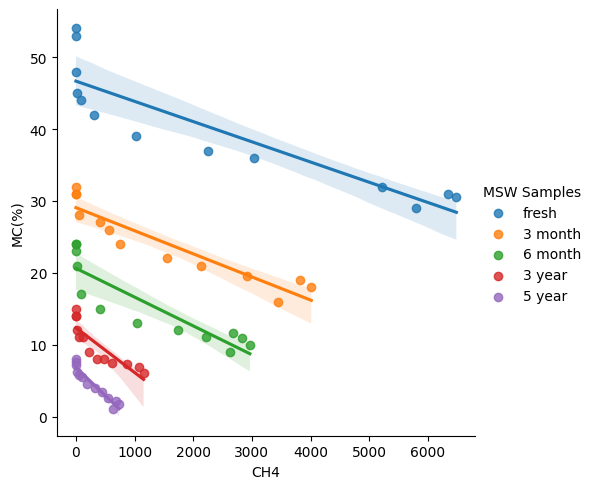

In [6]:
sns.lmplot(data=df, x="CH4", y="MC(%)", hue="MSW Samples")

In [7]:
df

MSW Samples  MC(%)    C/N  Ce(%)  He(%)  Li(%)    CH4      CO2
0        fresh  54.00  35.67     30     25     21    0.0      0.7
1        fresh  53.00  34.47     28     24     20    2.8     19.5
2        fresh  48.00  33.23     27     23     20    4.1    183.0
3        fresh  45.00  31.78     25     21     19   16.2    811.0
4        fresh  44.00  30.06     24     20     19   84.9   2442.0
..         ...    ...    ...    ...    ...    ...    ...      ...
60      5 year   3.34   5.34      8     13     24  445.0   8058.0
61      5 year   2.54   4.56      7     13     22  550.0  12031.0
62      5 year   2.13   3.21      6     12     22  678.0  16592.0
63      5 year   1.78   3.10      6     11     21  736.0  20556.0
64      5 year   1.00   2.25      5     11     20  629.0  23735.0

[65 rows x 8 columns]

In [8]:
df.columns

Index(['MSW Samples', 'MC(%)', 'C/N', 'Ce(%)', 'He(%)', 'Li(%)', 'CH4', 'CO2'], dtype='object')

<Axes: xlabel='MSW Samples', ylabel='CH4'>

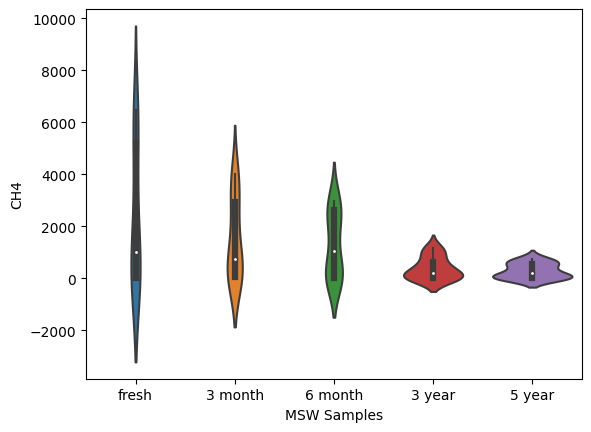

In [9]:
import seaborn as sns
sns.violinplot(data=df, y="CH4", x="MSW Samples")

In [10]:
shuffled_df = df.sample(frac=1, random_state=42)
# Reset the index of the shuffled DataFrame
shuffled_df.reset_index(drop=True, inplace=True)

In [11]:
shuffled_df

MSW Samples  MC(%)    C/N  Ce(%)  He(%)  Li(%)      CH4       CO2
0       5 year   7.53  10.04     12     17     29     0.04     10.18
1       5 year   3.34   5.34      8     13     24   445.00   8058.00
2        fresh  54.00  35.67     30     25     21     0.00      0.70
3       3 year   9.00   9.54     12     16     24   215.00   2445.00
4        fresh  42.00  28.67     23     20     18   311.00   5807.00
..         ...    ...    ...    ...    ...    ...      ...       ...
60       fresh  37.00  24.39     16     17     15  2249.00  18254.00
61      3 year  12.00  12.33     14     18     27    16.96    133.00
62     3 month  31.00  27.55     20     19     23     0.72     18.28
63     6 month  23.00  19.45     15     20     27     5.81     28.43
64      3 year   6.00   3.00      7     10     18  1154.00  25691.00

[65 rows x 8 columns]

In [12]:
import plotly.express as ex
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [13]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

In [14]:
# Plot a scatter plot using Plotly
fig = ex.scatter(shuffled_df, x='MC(%)', y='CH4', color="MSW Samples", title="Mositure content VS Menthane Production On the basis of solid waste age")
fig.show()


In [15]:
df.columns

Index(['MSW Samples', 'MC(%)', 'C/N', 'Ce(%)', 'He(%)', 'Li(%)', 'CH4', 'CO2'], dtype='object')

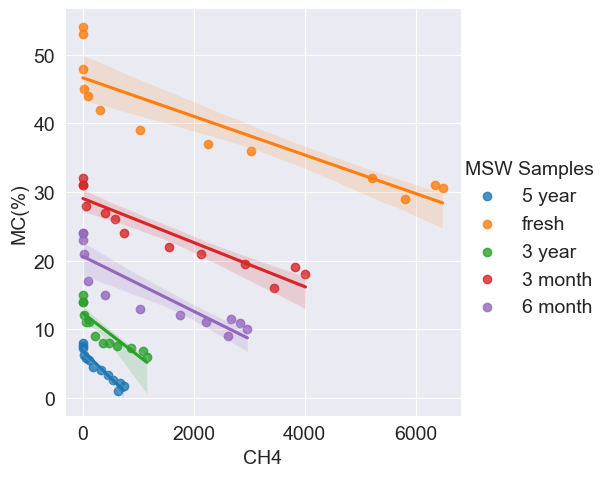

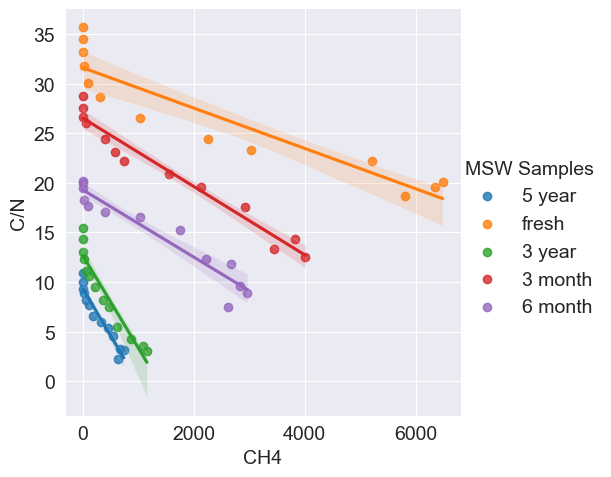

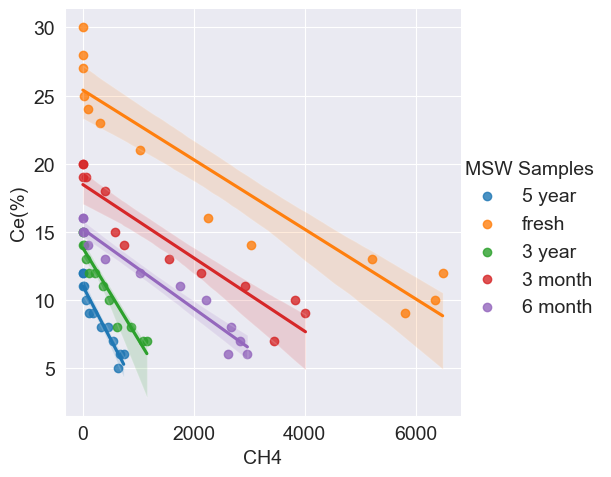

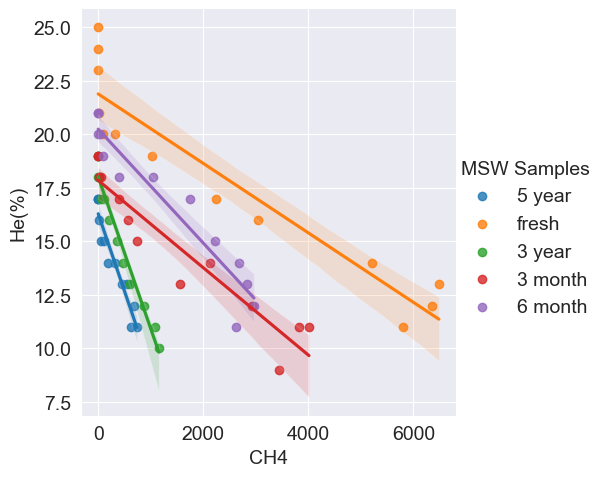

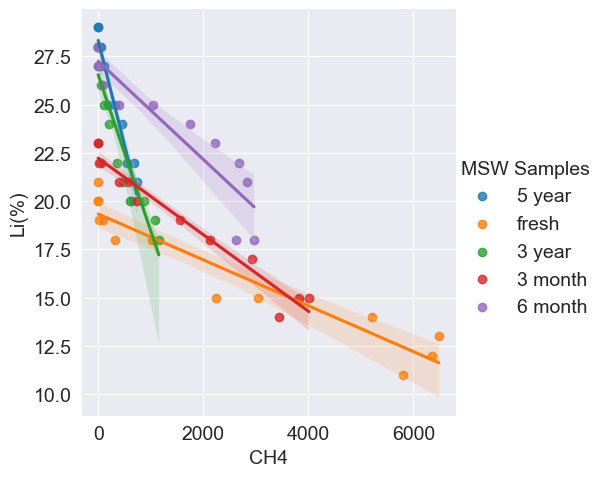

In [16]:
sns.lmplot(data=shuffled_df, x="CH4", y="MC(%)", hue="MSW Samples")
sns.lmplot(data=shuffled_df, x="CH4", y="C/N", hue="MSW Samples")
sns.lmplot(data=shuffled_df, x="CH4", y="Ce(%)", hue="MSW Samples")
sns.lmplot(data=shuffled_df, x="CH4", y="He(%)", hue="MSW Samples")
sns.lmplot(data=shuffled_df, x="CH4", y="Li(%)", hue="MSW Samples")
#sns.lmplot(data=shuffled_df, x="CH4", y="MC(%)", hue="MSW Samples")

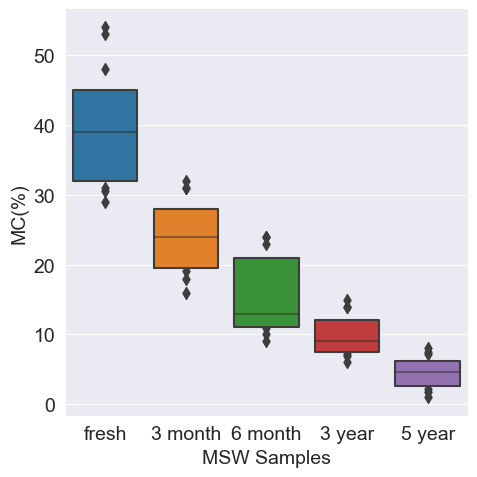

In [17]:
sns.catplot(data=df, y="MC(%)", x="MSW Samples", kind="boxen")

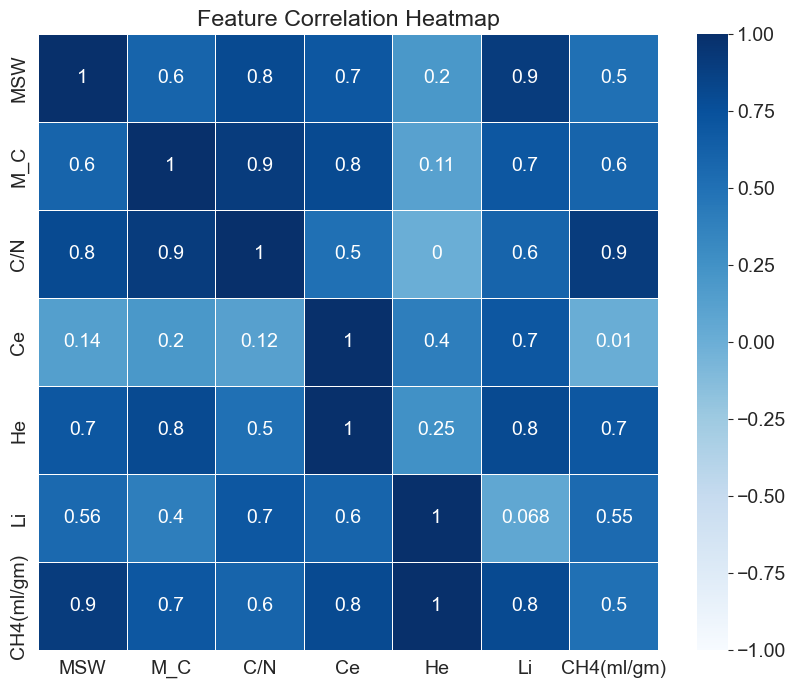

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the feature names
features = ['MSW', 'M_C', 'C/N', 'Ce', 'He', 'Li', 'CH4(ml/gm)']

# Define the correlation matrix
correlation_matrix = [
    [1, 0.6, 0.8, 0.7, 0.2, 0.9, 0.5],
    [0.6, 1, 0.9, 0.8, 0.11, 0.7, 0.6],
    [0.8, 0.9, 1, 0.5, 0, 0.6, 0.9],
    [0.14, 0.2, 0.12, 1, 0.4, 0.7, 0.01],
    [0.7, 0.8, 0.5, 1, 0.25, 0.8, 0.7],
    [0.56, 0.4, 0.7, 0.6, 1, 0.068, 0.55],
    [0.9, 0.7, 0.6, 0.8, 1, 0.8, 0.5]
]

# Create a DataFrame from the correlation matrix
df_corr = pd.DataFrame(correlation_matrix, columns=features, index=features)

# Set up the heatmap figure
plt.figure(figsize=(10, 8))
plt.title('Feature Correlation Heatmap')

# Create the heatmap using Seaborn with a blue color palette
sns.heatmap(df_corr, annot=True, cmap='Blues', vmin=-1, vmax=1, linewidths=0.5)

# Show the plot
plt.show()


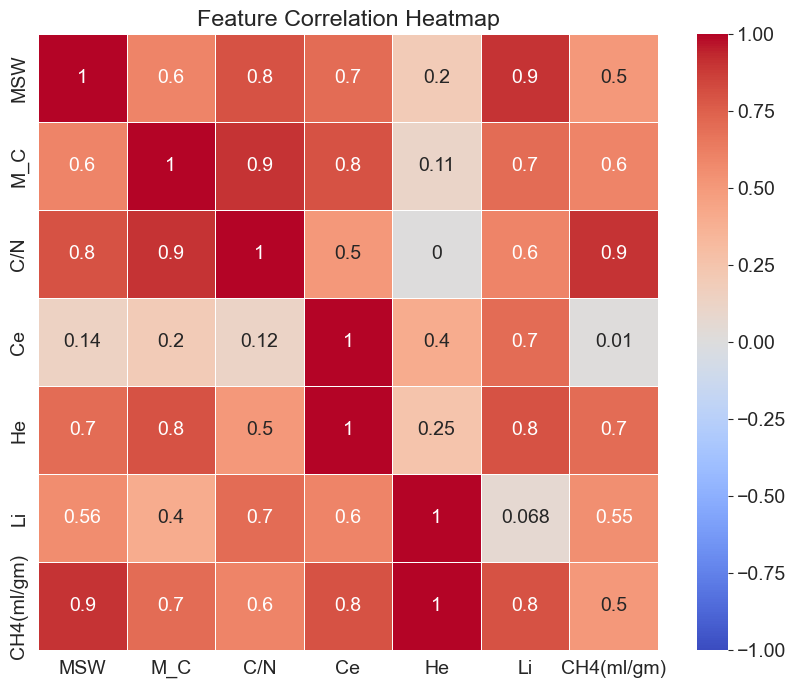

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the feature names
features = ['MSW', 'M_C', 'C/N', 'Ce', 'He', 'Li', 'CH4(ml/gm)']

# Define the correlation matrix
correlation_matrix = [
    [1, 0.6, 0.8, 0.7, 0.2, 0.9, 0.5],
    [0.6, 1, 0.9, 0.8, 0.11, 0.7, 0.6],
    [0.8, 0.9, 1, 0.5, 0, 0.6, 0.9],
    [0.14, 0.2, 0.12, 1, 0.4, 0.7, 0.01],
    [0.7, 0.8, 0.5, 1, 0.25, 0.8, 0.7],
    [0.56, 0.4, 0.7, 0.6, 1, 0.068, 0.55],
    [0.9, 0.7, 0.6, 0.8, 1, 0.8, 0.5]
]

# Create a DataFrame from the correlation matrix
df_corr = pd.DataFrame(correlation_matrix, columns=features, index=features)

# Set up the heatmap figure
plt.figure(figsize=(10, 8))
plt.title('Feature Correlation Heatmap')

# Create the heatmap using Seaborn
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Show the plot
plt.show()


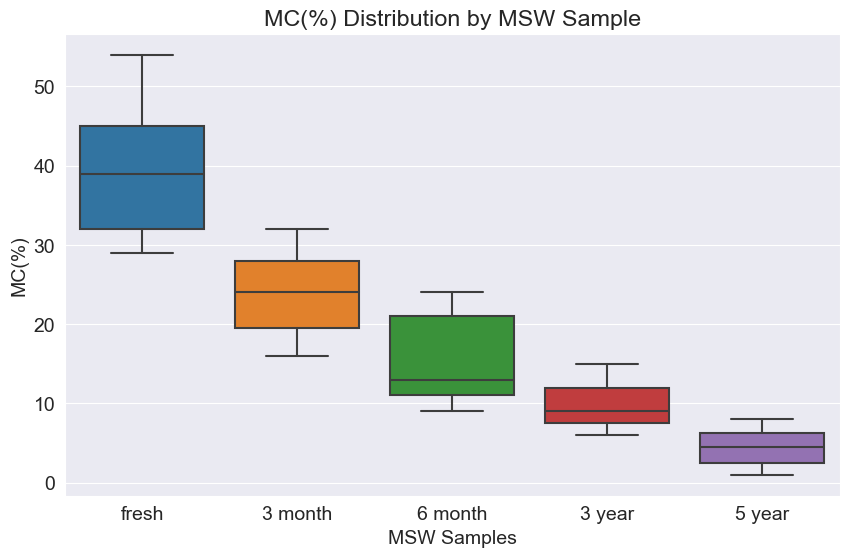

In [20]:
# Create a box plot using Seaborn
sns.boxplot(x=df['MSW Samples'], y=df['MC(%)'])
plt.xlabel('MSW Samples')
plt.ylabel('MC(%)')
plt.title('MC(%) Distribution by MSW Sample')
plt.show()

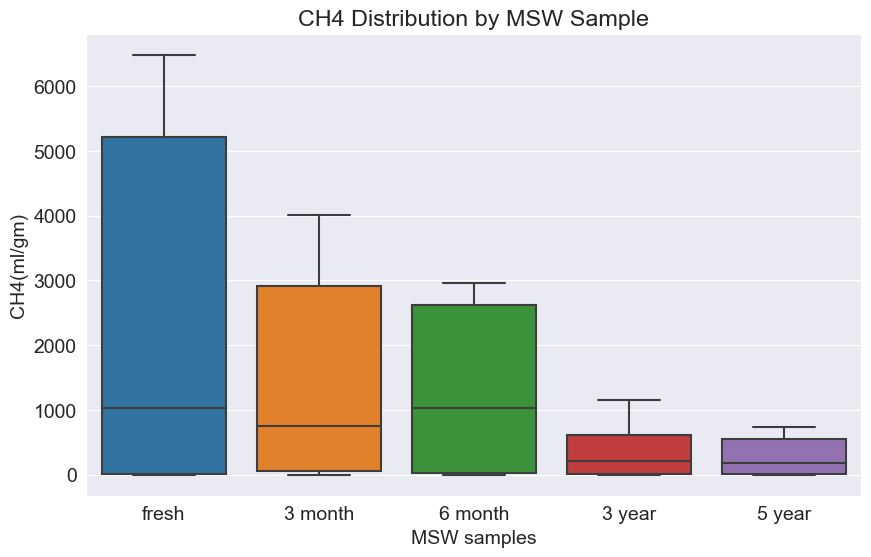

In [22]:
# Create a box plot using Seaborn
sns.boxplot(x=df['MSW Samples'], y=df['CH4'])
plt.xlabel('MSW samples')
plt.ylabel('CH4(ml/gm)')
plt.title('CH4 Distribution by MSW Sample')
plt.show()

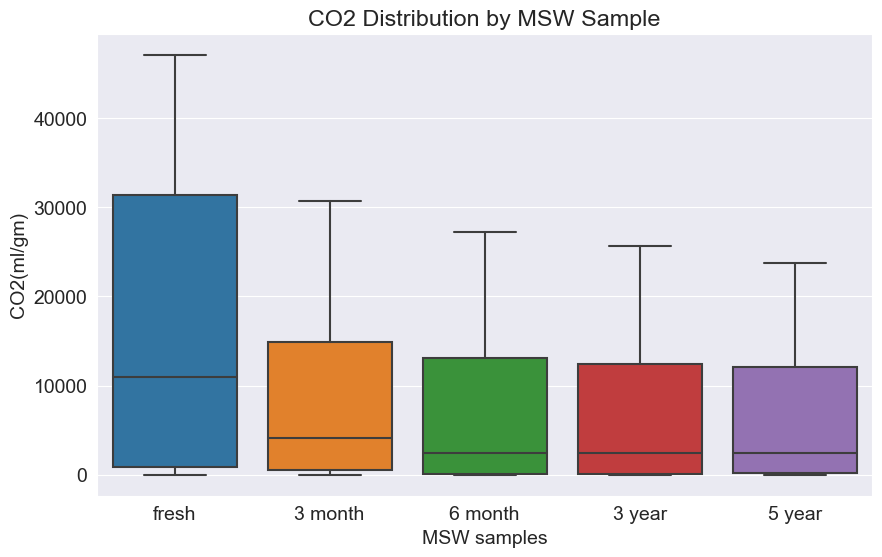

In [23]:
# Create a box plot using Seaborn
sns.boxplot(x=df['MSW Samples'], y=df['CO2'])
plt.xlabel('MSW samples')
plt.ylabel('CO2(ml/gm)')
plt.title('CO2 Distribution by MSW Sample')
plt.show()

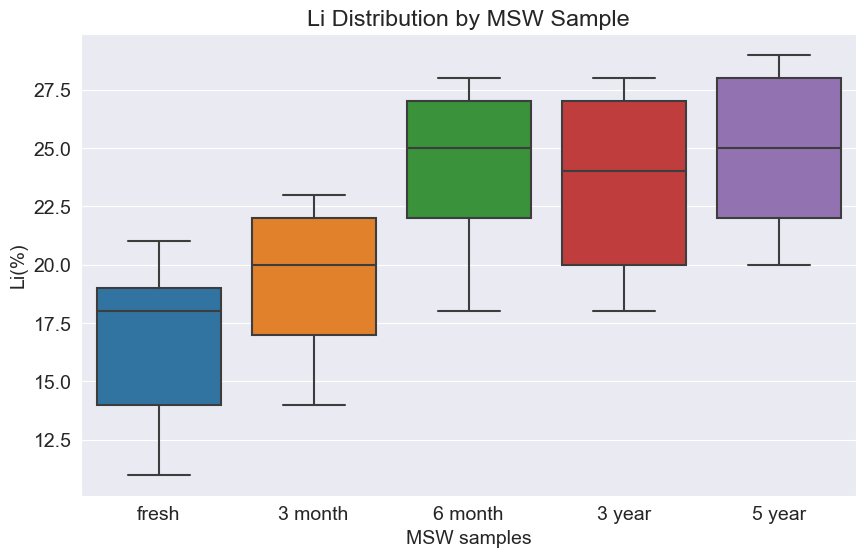

In [24]:
sns.boxplot(x=df['MSW Samples'], y=df['Li(%)'])
plt.xlabel('MSW samples')
plt.ylabel('Li(%)')
plt.title('Li Distribution by MSW Sample')
plt.show()

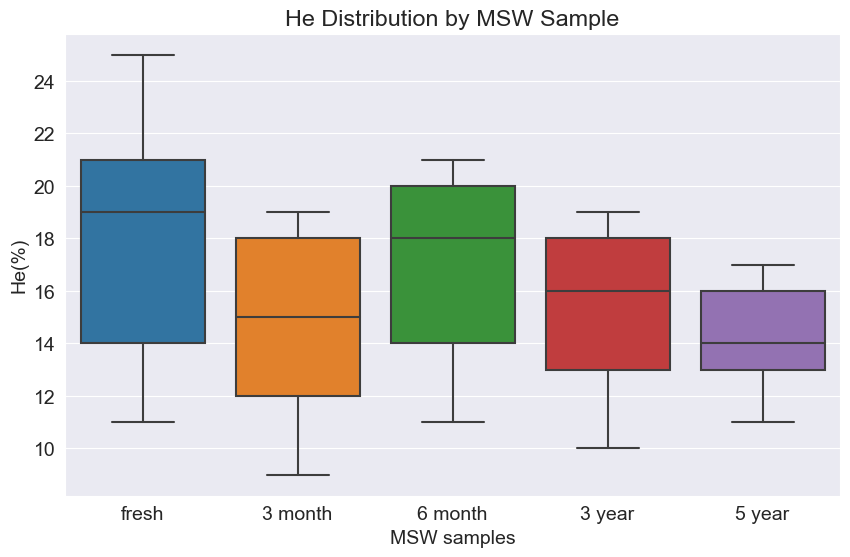

In [25]:
sns.boxplot(x=df['MSW Samples'], y=df['He(%)'])
plt.xlabel('MSW samples')
plt.ylabel('He(%)')
plt.title('He Distribution by MSW Sample')
plt.show()

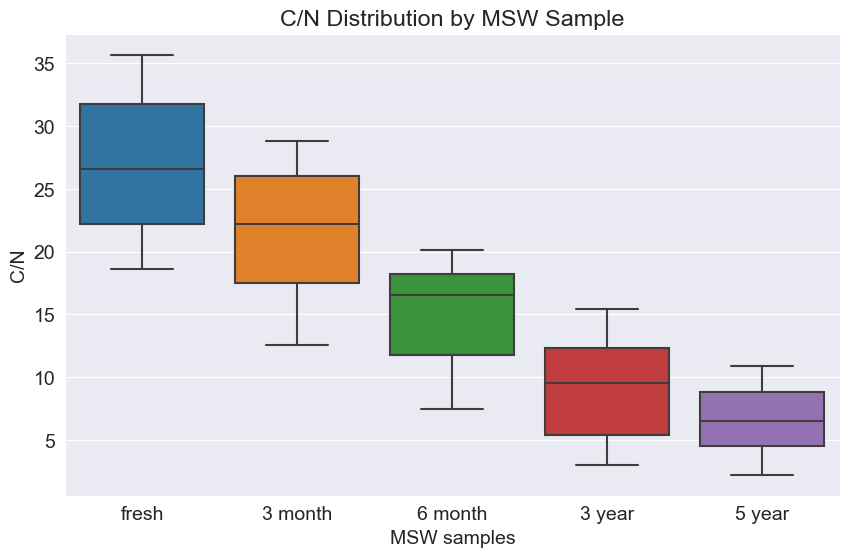

In [26]:
sns.boxplot(x=df['MSW Samples'], y=df['C/N'])
plt.xlabel('MSW samples')
plt.ylabel('C/N')
plt.title('C/N Distribution by MSW Sample')
plt.show()

In [27]:
#neeed to replace string into number
shuffled_df["MSW Samples"].replace({"fresh":0, "3 month":1, "6 month":2, "3 year":3,  "5 year":4 }, inplace=True)

In [28]:
pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Model genration
#### Linear Regression

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
x = shuffled_df.drop(["CH4", "CO2"], axis=1)
y = shuffled_df["CH4"]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [32]:
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train, y_train))
reg.score(x_test, y_test)

0.869167612420133


0.3395650196977693

60    2249.00
46       2.80
59    1556.00
4      311.00
12       4.15
1      445.00
5      550.00
64    1154.00
8      629.00
27     183.00
23     615.00
63       5.81
42    2966.00
Name: CH4, dtype: float64
[3575.52906851  222.70913917 1878.34035038  945.45250955 -329.6822966
  484.07796477 1003.29747876 1919.51995165 1725.40986734  184.17302297
 1769.7413111   904.24334447 3424.59350667]
[447.39675841 139.14139022  32.49718008 473.67827851 108.77073034
  65.7532736 ]


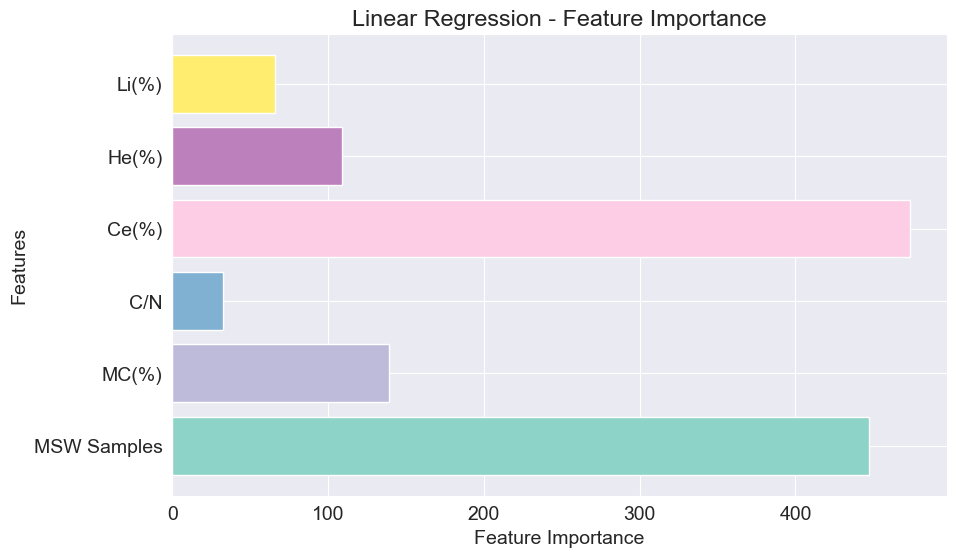

In [33]:
#test score
y_test_p = reg.predict(x_test)
print(y_test)
print(y_test_p)
import matplotlib.pyplot as plt
import numpy as np
# Define the feature importance values and feature names
feature_importance = np.abs(reg.coef_)
feature_names = x_train.columns
print(feature_importance)
# Define a color palette for the features
color_palette = plt.cm.Set3(np.linspace(0, 1, len(feature_names)))

# Create the bar chart with colored features
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color=color_palette)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Linear Regression - Feature Importance')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_test_p)
print("Mean Squared Error:", mse**0.5)

Mean Squared Error: 721.7487910110601


Mean Absolute Error: 592.639216303743


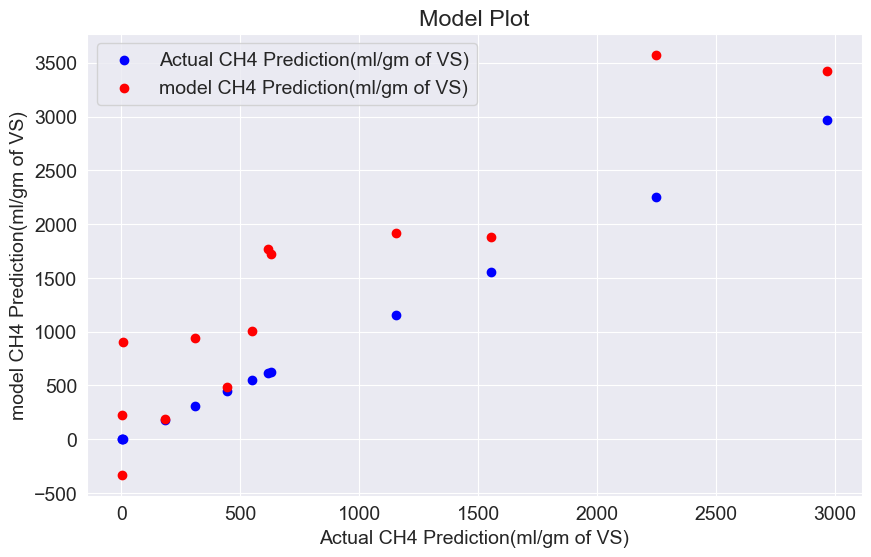

In [35]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_test_p)
print("Mean Absolute Error:", mae)
predicted_values = y_test_p
# Assuming you have the actual values from the dataset stored in a variable called 'y'
actual_values = y_test  # y represents the dependent variable in your dataset

# Create a scatter plot with the actual values
plt.scatter(actual_values, actual_values, label='Actual CH4 Prediction(ml/gm of VS)', color='blue')

# Add the model's predicted values to the plot
plt.scatter(actual_values, predicted_values, label='model CH4 Prediction(ml/gm of VS)', color='red')

# Add labels and title
plt.xlabel('Actual CH4 Prediction(ml/gm of VS)')
plt.ylabel('model CH4 Prediction(ml/gm of VS)')
plt.title('Model Plot')

# Display the legend
plt.legend()

# Display the plot
plt.show()

## Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


# Create and train the Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)
print(rf_regressor.score(x_train, y_train))
print(rf_regressor.score(x_test, y_test))

# Make predictions on the test set
y_pred = rf_regressor.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print(r2)

0.985269103403694
0.6872398718187873
Mean Squared Error: 246691.07911974227
Root Mean Squared Error: 496.6800570988755
Mean Absolute Error: 353.28709999999995
0.6872398718187873


[0.02906755 0.02990662 0.03620994 0.03769942 0.07082901 0.79628746] Index(['MSW Samples', 'MC(%)', 'C/N', 'Ce(%)', 'He(%)', 'Li(%)'], dtype='object')


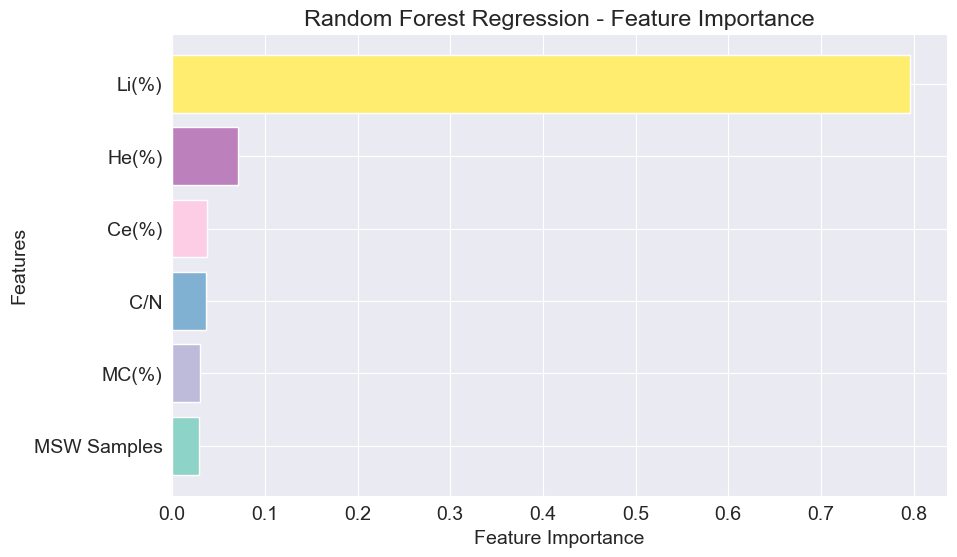

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Define the feature importance values and feature names
feature_importance = rf_regressor.feature_importances_
feature_names = x_train.columns

# Define a color palette for the features
color_palette = plt.cm.Set3(np.linspace(0, 1, len(feature_names)))

# Create the bar chart with colored features
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color=color_palette)
print(feature_importance, feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Regression - Feature Importance')
plt.show()


In [38]:
from sklearn.tree import plot_tree, export_text

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

tree = rf_regressor.estimators_[0]
plt.figure(figsize=(10, 10))
plot_tree(tree, filled=True)
plt.title("Random Forest tree")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}

# Create the Random Forest Regression model
rf_regressor = RandomForestRegressor(random_state=42)


In [ ]:
# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
predicted_values = y_pred
# Assuming you have the actual values from the dataset stored in a variable called 'y'
actual_values = y_test  # y represents the dependent variable in your dataset

# Create a scatter plot with the actual values
plt.scatter(actual_values, actual_values, label='Actual CH4 Production(ml/gm of VS)', color='blue')

# Add the model's predicted values to the plot
plt.scatter(actual_values, predicted_values, label='Model CH4 Prediction(ml/gm of VS) ', color='red')

# Add labels and title
plt.xlabel('Actual CH4 Production(ml/gm of VS)')
plt.ylabel('Model CH4 Prediction(ml/gm of VS)')
plt.title('Model Plot')

# Display the legend
plt.legend()

# Display the plot
plt.show()

## SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create and train the Support Vector Regression model
svr_regressor = SVR(kernel='linear')
svr_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svr_regressor.predict(x_test)
y_train_pred = svr_regressor.predict(x_train)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_t = r2_score(y_train, y_train_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("R-squared Score:", r2_t)
predicted_values = y_pred
# Assuming you have the actual values from the dataset stored in a variable called 'y'
actual_values = y_test  # y represents the dependent variable in your dataset

# Create a scatter plot with the actual values
plt.scatter(actual_values, actual_values, label='Actual CH4 Prediction(ml/gm of VS)', color='blue')

# Add the model's predicted values to the plot
plt.scatter(actual_values, predicted_values, label='Model CH4 Prediction(ml/gm of VS)', color='red')

# Add labels and title
plt.xlabel('Actual CH4 Prediction(ml/gm of VS)')
plt.ylabel('Model CH4 Prediction(ml/gm of VS)')
plt.title('Model Plot')

# Display the legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
feature_importance = np.abs(svr_regressor.coef_[0])
#feature_importance = reg.feature_importances_
feature_names = x_train.columns

# Define a color palette for the features
color_palette = plt.cm.Set3(np.linspace(0, 1, len(feature_names)))
print(feature_names, feature_importance)
# Create the bar chart with colored features
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color=color_palette)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for SVM')
plt.show()

In [ ]:
# XG REGRESSION

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(x_train, y_train)
print(xgb_regressor.score(x_train, y_train))

# Make predictions on the test set
y_pred = xgb_regressor.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("y_test", y_test)
print("y_predict", y_pred)
predicted_values = y_pred
# Assuming you have the actual values from the dataset stored in a variable called 'y'
actual_values = y_test  # y represents the dependent variable in your dataset

# Create a scatter plot with the actual values
plt.scatter(actual_values, actual_values, label='Actual CH4 Prediction(ml/gm of VS)', color='blue')

# Add the model's predicted values to the plot
plt.scatter(actual_values, predicted_values, label='Model CH4 Prediction(ml/gm of VS)', color='red')

# Add labels and title
plt.xlabel('Actual CH4 Prediction(ml/gm of VS)')
plt.ylabel('Model CH4 Prediction(ml/gm of VS)')
plt.title('Model Plot')

# Display the legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
pip install graphviz

In [ ]:
import matplotlib.pyplot as plt

# Define a color palette for the features
color_palette = plt.cm.Set3(np.linspace(0, 1, len(feature_names)))

# Create the bar chart with colored features
plt.figure(figsize=(10, 6))
feature_importance = xgb_regressor.feature_importances_
feature_names = x_train.columns

print(feature_names, feature_importance)
plt.barh(feature_names, feature_importance, color=color_palette)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Regression - Feature Importance')
plt.show()

In [ ]:
## ANN

In [ ]:
pip install tensorflow

In [ ]:
%%capture
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Define the architecture of the ANN
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)


In [ ]:
# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
predicted_values = y_pred
# Assuming you have the actual values from the dataset stored in a variable called 'y'
actual_values = y_test  # y represents the dependent variable in your dataset

# Create a scatter plot with the actual values
plt.scatter(actual_values, actual_values, label='Actual CH4 Prediction(ml/gm of VS)', color='blue')

# Add the model's predicted values to the plot
plt.scatter(actual_values, predicted_values, label='model CH4 Prediction(ml/gm of VS)', color='red')

# Add labels and title
plt.xlabel('Actual CH4 Prediction(ml/gm of VS)')
plt.ylabel('model CH4 Prediction(ml/gm of VS)')
plt.title('Model Plot')

# Display the legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
x = np.array(x)
df

In [ ]:
import seaborn as sns

# Assuming your DataFrame has two columns: 'x' for the independent variable and 'y' for the dependent variable
sns.regplot(x=df["M_C"], y=y)

# Display the plot
plt.show()


In [ ]:
sns.pairplot(df)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# R^2 values for the five models
r2_values = [0.23, -0.24, 0.99, -0.43, 0.98]
r2_values_test = [0.24, -0.25, 0.88, -0.42, 0.68]

# RMSE values for the five models
rmse_values = [721.75, 989.09, 305.76, 1065.01, 469.68]

# Create a list of model names
model_names = ['Linear Regression', 'SVM', 'XGBoost', 'ANN', 'Random Forest']
colors = plt.cm.Set3(np.linspace(0, 1, len(model_names)))
# Plot R^2 values
plt.figure(figsize=(8, 4))
plt.bar(model_names, r2_values, color=colors)
plt.xlabel('Models')
plt.ylabel('R^2')
plt.title('R^2 Comparison of Five Models')
plt.ylim(min(r2_values) - 0.1, 1) # Set the y-axis limits between 0 and 1
plt.show()

# Plot RMSE values
plt.figure(figsize=(8, 4))
plt.bar(model_names, rmse_values, color=colors)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Five Models')
plt.ylim(0, max(rmse_values) + 0.5)  # Set the y-axis limits based on the maximum RMSE value
plt.show()


In [ ]:
# Plot R^2 values as a line graph
plt.figure(figsize=(8, 4))
plt.plot(model_names, r2_values, marker='o', linestyle='-', color="blue")
plt.xlabel('Models')
plt.ylabel('R^2')
plt.title('R^2 Comparison of Five Models')
plt.ylim(min(r2_values) - 0.1, 1)  # Set the y-axis limits based on the minimum R^2 value and maximum of 1
plt.show()

# Plot RMSE values as a line graph
plt.figure(figsize=(8, 4))
plt.plot(model_names, rmse_values, marker='o', linestyle='-', color="blue")
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Five Models')
plt.ylim(0, max(rmse_values) + 0.5)  # Set the y-axis limits based on the maximum RMSE value
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Define the model names, performance values (R^2), and RMSE values
model_names = ['XGBoost', 'Linear Regression', 'Random Forest', 'Decision Tree', 'Artificial Neural Network']
performance_values = [0.85, 0.78, 0.92, 0.81, 0.87]
r2_values = [0.72, 0.62, 0.83, 0.71, 0.75]

# Define the color for each model
colors = ['blue', 'green', 'orange', 'purple', 'red']

# Plot the hierarchical view of performance
plt.figure(figsize=(10, 8))

# Plot the line graph
plt.plot(model_names, performance_values, '-o', color='black', label='Performance')

# Plot the R^2 values as points
plt.scatter(model_names, performance_values, s=100, c=colors, edgecolors='black', label='R^2')

# Customize the plot
plt.xlabel('Models')
plt.ylabel('Performance (R^2)')
plt.title('Hierarchical View of Model Performance')
plt.legend()

# Add R^2 values as annotations
for i in range(len(model_names)):
    plt.annotate(f"R^2: {r2_values[i]:.2f}", (model_names[i], performance_values[i]), xytext=(5, 10),
                 textcoords='offset points', ha='center')

# Show the plot
plt.show()


In [ ]:
# Set up the regression plot figure
features = ['MSW', 'M_C', 'C/N', 'Ce', 'He', 'Li']

plt.figure(figsize=(10, 6))
plt.suptitle('Regression Plots for CH4 with Features')

# Create individual regression plots
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.regplot(x=feature, y='CH4', data=df, ci=None)
    plt.title(f'CH4 vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('CH4')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()